# Road Rage: Finding the Ideal Speed Limit

### Assumptions
* Drivers want to go up to 120 km/hr.
* The average car is 5 meters long.
* Drivers want at least a number of meters equal to their speed in meters/second between them and the next car.
* Drivers will accelerate 2 m/s<sup>2</sup> up to their desired speed as long as they have room to do so.
* If another car is too close, drivers will match that car's speed until they have room again.
* If a driver would hit another car by continuing, they stop.
* Drivers will randomly (10% chance each second) slow by 2 m/s.
* This section of road is one lane going one way.
* Assume that drivers enter the road at the speed they left.
* Simulation starts with 30 cars per kilometer, evenly spaced.

## Hard Mode
We have a 7 kilometer section of road being built and do not know what the speed limit should be. This notebook simulates the 7 kilometers of road. Even though this road is not circular, the simulation treats it as such in order to generate a continuous flow of traffic.
* km 1: straight
* km 2: bend (chance to slow + 40%)
* km 3: straight
* km 4: tight bend (chance to slow + 100%)
* km 5: straight
* km 6: slight bend (chance to slow + 20%)
* km 7: straight

In [1]:
from copy import deepcopy
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from traffic_lib import *
%matplotlib inline

`HighwaySim.sim_data` is a list of lists; one list of each car's speed for each of the "ticks"

In [2]:
def highway_trials(num_trials=1000, speed_limit=33, duration=60, mode=0):
    """
    Run num_trials of run_sim
    """
    trial_stats = []
    for _ in range(num_trials):
        sim = HighwaySim(speed_limit, mode)
        trial_stats.append(sim.run_sim(duration))
    return trial_stats

In [5]:
highway_1000_33_data = highway_trials(100, mode=1)

In [6]:
highway_1000_33_mean = np.mean(np.array(highway_1000_33_data))
highway_1000_33_std = np.std(np.array(highway_1000_33_data))
print("1000-Trial Mean: {}".format(highway_1000_33_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_33_std))
print("Speed Limit Recommendation: {}".format(int(highway_1000_33_mean + highway_1000_33_std)))

1000-Trial Mean: 12.533679796216605
1000-Trial Standard Deviation: 1.8358341375066878
Speed Limit Recommendation: 14


In [7]:
highway_1000_14_data = highway_trials(100, 14, mode=1)

In [8]:
highway_1000_14_mean = np.mean(np.array(highway_1000_14_data))
highway_1000_14_std = np.std(np.array(highway_1000_14_data))
print("1000-Trial Mean: {}".format(highway_1000_14_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_14_std))

1000-Trial Mean: 10.28984686361834
1000-Trial Standard Deviation: 1.151549142394857


### Note About The Above
The **standard deviation of 0.376 at 21 m/s** is lower than for the 1000-trial simulation at both 20 m/s and 21 m/s, indicating that there is the least amount of deviation from the speed limit at this speed.

In [ ]:
highway_1000_11_data = highway_trials(100, 11, mode=1)

In [ ]:
highway_1000_11_mean = np.mean(np.array(highway_1000_11_data))
highway_1000_11_std = np.std(np.array(highway_1000_11_data))
print("1000-Trial Mean: {}".format(highway_1000_11_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_11_std))

In [ ]:
highway_1000_22_data = highway_trials(1000, 22)

In [ ]:
highway_1000_22_mean = np.mean(np.array(highway_1000_22_data))
highway_1000_22_std = np.std(np.array(highway_1000_22_data))
print("1000-Trial Mean: {}".format(highway_1000_22_mean))
print("1000-Trial Standard Deviation: {}".format(highway_1000_22_std))

In [11]:
sim1 = HighwaySim(mode=1)
sim1.run_sim(60)
sim2 = HighwaySim(14, mode=1)
sim2.run_sim(60)
sim3 = HighwaySim(11, mode=1)
sim3.run_sim(60)
sim4 = HighwaySim(15, mode=1)
sim4.run_sim(60)
pass

Graphs of Single Trial at Noted Speed


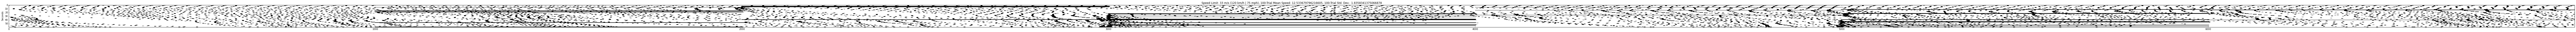

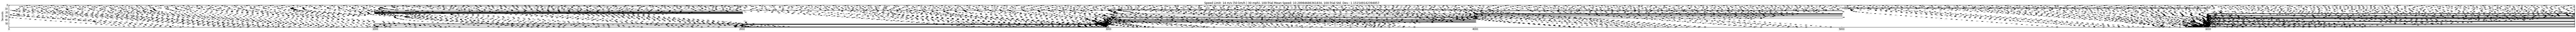

In [14]:
print('Graphs of Single Trial at Noted Speed\n(download to view at size)')
plt.figure(figsize=(200, 200)) # size is in "inches"
plt.imshow(sim1.sim_graph, cmap='gray', interpolation='nearest')
plt.title('Speed Limit: 33 m/s (120 km/h | 75 mph), 100-Trial Mean Speed: {}, 100-Trial Std. Dev.: {}'.format(
          highway_1000_33_mean, highway_1000_33_std))
plt.ylabel('Seconds')
plt.show()

plt.figure(figsize=(200, 200)) # size is in "inches"
plt.imshow(sim2.sim_graph, cmap='gray', interpolation='nearest')
# plt.title('Speed Limit: 14 m/s (50 km/h | 30 mph)')
plt.title('Speed Limit: 14 m/s (50 km/h | 30 mph), 100-Trial Mean Speed: {}, 100-Trial Std. Dev.: {}'.format(
          highway_1000_14_mean, highway_1000_14_std))
plt.ylabel('Seconds')
plt.show()

# plt.figure(figsize=(20, 20)) # size is in "inches"
# plt.imshow(sim3.sim_graph, cmap='gray', interpolation='nearest')
# plt.title('Speed Limit: 21 m/s (76 km/h | 45 mph)')
# plt.title('Speed Limit: 21 m/s (76 km/h | 45 mph), 1000-Trial Mean Speed: {}, 1000-Trial Std. Dev.: {}'.format(
#           highway_1000_21_mean, highway_1000_21_std))
# plt.ylabel('Seconds')
# plt.show()

# plt.figure(figsize=(20, 20)) # size is in "inches"
# plt.imshow(sim4.sim_graph, cmap='gray', interpolation='nearest')
# plt.title('Speed Limit: 22 m/s (79 km/h | 49 mph)')
# plt.title('Speed Limit: 22 m/s (79 km/h | 49 mph), 1000-Trial Mean Speed: {}, 1000-Trial Std. Dev.: {}'.format(
#           highway_1000_22_mean, highway_1000_22_std))
# plt.ylabel('Seconds')
# plt.show()

### Analysis of Single-Simulation Graphs at Different Speed Limits

In the graph of the speed limit 120 km/h | 75 mph, we see wave trends, indicating collection of traffic. Even with the "ideal" 40 km/h speed limit, there are terrible traffic backups in the curved sections.

In [ ]:
car1 = Car(4,0)

In [ ]:
type(car1)